In [1]:
import os
import json
import numpy as np
import pandas as pd
from gensim.models import FastText
from sklearn.model_selection import train_test_split

### Load processed data

In [2]:
INDIR = 'data'
game_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed_1.json')
with open(game_dir, 'r') as f:
    games = json.load(f)

# Convert data from json to csv
games = pd.DataFrame.from_dict(games)

In [47]:
games['reviews_clean']

0         installing struggle windows live bugs champion...
1         rally cars oriented 34 european market 34 amer...
2         1st shipment received book 2nd shipment fake a...
3         turned mistake versions 95 percent pc versions...
4         dirt okay started laptop build collection dirt...
                                ...                        
231775    funny rating sellers ripping supposedly rating...
231776    deluxe 32gb u kart 8 separately 350 limited ed...
231777    package red show steering wheel retail value 3...
231778    newegg 329 00 packaging alittle mine arrived b...
231779    retail store target walmart gamestop heck newe...
Name: reviews_clean, Length: 231780, dtype: object

In [3]:
words = ' '.join(games['reviews_clean'])

In [4]:
words = words.split()

In [5]:
len(set(words))

209723

### Load embedding model (dim=150, window=5, sg=1)

In [6]:
INDIR = 'model'
embed_path = os.path.join(INDIR, 'embed_model_cbow_150_10_train.model')
embed_model = FastText.load(embed_path)

In [7]:
df_train, df_test = train_test_split(games, test_size = 0.20, random_state = 123)

In [8]:
df_train = df_train.reset_index()

### Compute the user and item features

In [9]:
def l2_norm(x):
    return np.sqrt(np.sum(x**2))

def div_norm(x):
    norm_value = l2_norm(x)
    if norm_value > 0:
        return x * ( 1.0 / norm_value)
    else:
        return x

In [10]:
# average
game_features = []
for review in df_train['reviews_clean']:
    word_embed = np.zeros(150)
    for word in review.split():
        word_embed += div_norm(embed_model[word])
    word_embed += div_norm(embed_model['\n'])
    word_embed = word_embed / (len(review.split()) + 1)
    game_features.append(word_embed)

<ipython-input-10-1dc7f25c3ab6>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_embed += div_norm(embed_model[word])
<ipython-input-10-1dc7f25c3ab6>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_embed += div_norm(embed_model['\n'])


In [11]:
columns = [str(x + 1) for x in range(150)]
# game_df = pd.DataFrame({'features': game_features})
game_df = pd.DataFrame(list(map(np.ravel, game_features)), columns=columns)

In [12]:
game_df['overall'] = [int(x) for x in df_train['overall']]

In [10]:
game_df

1         2         3         4         5         6         7  \
0       0.005459  0.006343 -0.053987 -0.002870 -0.028277 -0.011665 -0.001428   
1       0.001873  0.031867 -0.001580 -0.003888 -0.048189  0.027031  0.008161   
2       0.033146  0.072383  0.014183  0.005502 -0.014344  0.001778  0.024035   
3       0.008544  0.055406 -0.001921  0.001592 -0.047605  0.035025  0.023241   
4       0.001276  0.027959 -0.024082  0.024446 -0.044089  0.018712  0.016132   
...          ...       ...       ...       ...       ...       ...       ...   
185419 -0.005040  0.027709 -0.023419  0.004624 -0.067917  0.059581  0.023691   
185420  0.011943  0.027664 -0.010572 -0.012158 -0.066671  0.041871  0.003971   
185421 -0.013122  0.015915  0.001823 -0.030001 -0.053116  0.054454 -0.008857   
185422  0.027091  0.052155 -0.005392 -0.015364 -0.064182  0.028255  0.022702   
185423  0.008667 -0.004210 -0.027044 -0.001453 -0.010913 -0.029104  0.012312   

               8         9        10  ...       142       143       144  \
0      -0.008439 -0.070132  0.028870  ...  0.028043 -0.017661 -0.024467   
1       0.012808 -0.062263  0.000289  ...  0.009639  0.009724  0.004029   
2       0.004362 -0.026221  0.017987  ... -0.011579  0.001475 -0.008174   
3       0.002551 -0.073674 -0.012211  ...  0.019973  0.014491 -0.005216   
4       0.023413 -0.075660  0.012908  ...  0.019763 -0.021684 -0.011747   
...          ...       ...       ...  ...       ...       ...       ...   
185419  0.011543 -0.069971 -0.003173  ...  0.043422  0.001640 -0.029921   
185420  0.000893 -0.039793  0.007354  ...  0.019006  0.034669 -0.017525   
185421 -0.018248 -0.033436  0.002386  ... -0.016377 -0.036548  0.020993   
185422  0.000611 -0.056033  0.028158  ...  0.026149  0.020393 -0.004116   
185423 -0.072723 -0.016435  0.008009  ... -0.021732 -0.051074  0.013325   

             145       146       147       148       149       150  overall  
0      -0.037657  0.043700 -0.022214 -0.006640  0.070425  0.002792        2  
1       0.029478  0.032981  0.008059  0.010415 -0.017462  0.010482        5  
2      -0.038391  0.063379  0.047634  0.055648 -0.024639  0.021210        5  
3       0.007367  0.040651  0.022259  0.023992 -0.016006  0.035684        3  
4       0.034208  0.043080 -0.007256 -0.015002 -0.010882 -0.002243        5  
...          ...       ...       ...       ...       ...       ...      ...  
185419 -0.022114  0.068002  0.046575  0.034162 -0.043442 -0.014554        3  
185420 -0.032381  0.038401  0.026346  0.011710 -0.036811 -0.010236        5  
185421 -0.022619  0.020421  0.011947 -0.010828  0.012651 -0.007630        4  
185422  0.001106  0.038473  0.057144  0.008581  0.000727  0.008478        5  
185423 -0.020811  0.021173 -0.034065 -0.043399  0.009336  0.065343        5  

[185424 rows x 151 columns]

### LDA

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def preprocessdata(data):
    """
        Preprocess the data with StandardScalar and Label Encoder
    :param data: input dataframe of training or test set 
    """
    labels = data['overall']
    features = data.drop(['overall'], axis=1)
    columns = features.columns
    enc = LabelEncoder()
    enc.fit(labels)
    labels = enc.transform(labels)
    features = StandardScaler().fit_transform(features)
    return features, labels, columns, data['overall']

In [15]:
Xtrain, Ytrain, COLUMNS, ACTUAL_LABELS = preprocessdata(game_df)

In [16]:
def applylda(trainX, trainY, actual_labels):
    lda = LinearDiscriminantAnalysis()
    lda.fit(trainX, trainY)
    # Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    plt.plot(np.cumsum(lda.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')  # for each component
    plt.title('Segmentation Dataset Explained Variance')
    plt.show(block=True)
    lda = LinearDiscriminantAnalysis(n_components=4)
    lda.fit(trainX, trainY)
    trainX_lda = lda.transform(trainX)
    return trainX_lda
#     # Plot Pairwise relationship between LDA components
#     plt.figure(figsize=(10, 8), dpi=80)
#     visualizedf = pd.DataFrame(trainX_lda, columns=['LDA1', 'LDA2', 'LDA3', 'LDA4'])
#     visualizedf = pd.concat([visualizedf, pd.DataFrame({'LABELS': actual_labels})], axis=1)
# #     print(visualizedf[0:5])
# #     print(visualizedf.sample(n=5))
#     sns.pairplot(visualizedf, vars=visualizedf.columns[:-1], hue="LABELS", palette="tab10_r")
#     plt.show(block=True)
# #     applyrandomforest(trainX_lda, testX_lda, trainY, testY)

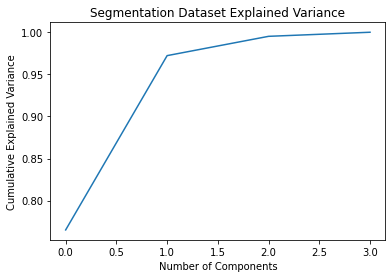

In [17]:
trainX_lda = applylda(Xtrain, Ytrain, actual_labels=ACTUAL_LABELS)

embed_model_cbow_150_5_train.model

In [18]:
from scipy.spatial import ConvexHull
def encircle(x, y, ax=None, **kw):  #定义encircle函数，圈出重点关注的点
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

In [19]:
palette = {1: 'darkgoldenrod', 2: 'lightgreen', 3: 'lightcoral', 4: 'royalblue', 5: 'mediumpurple'}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 864x864 with 0 Axes>

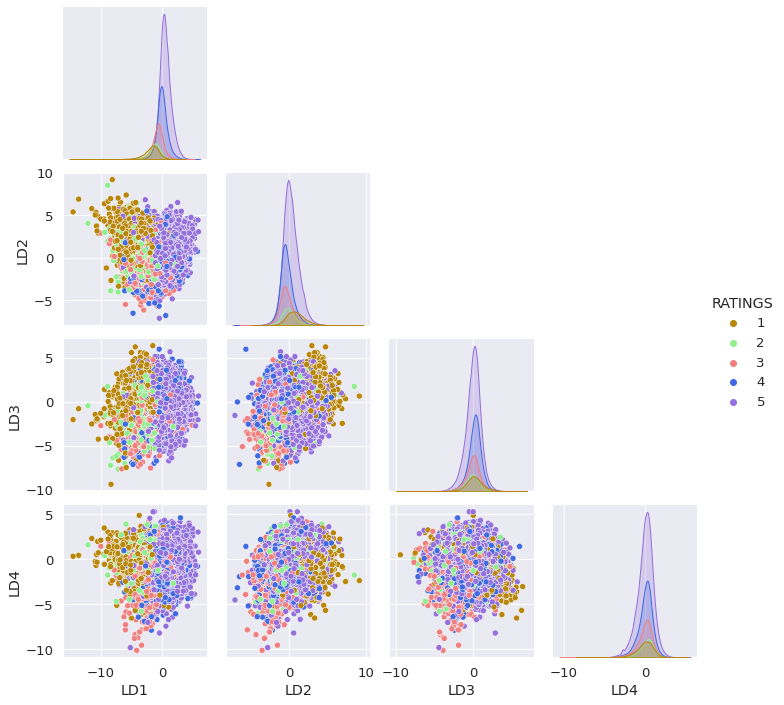

In [26]:
# Plot Pairwise relationship between LDA components
plt.figure(figsize=(12, 12))
visualizedf = pd.DataFrame(trainX_lda, columns=['LD1', 'LD2', 'LD3', 'LD4'])
visualizedf = pd.concat([visualizedf, pd.DataFrame({'RATINGS': ACTUAL_LABELS})], axis=1)
#     print(visualizedf[0:5])
#     print(visualizedf.sample(n=5))
sns.set(font_scale=1.2)
lda_plot = sns.pairplot(visualizedf, vars=visualizedf.columns[:-1], hue="RATINGS", palette=palette, corner=True)
# lda_plot.map_lower(sns.kdeplot, levels=4, color=".2")
# plt.show(block=True)
#     applyrandomforest(trainX_lda, testX_lda, trainY, testY)
# g.map_lower(sns.kdeplot, levels=4, color=".2")
# lda_plot.fig.suptitle('Pairwise Scatterplot of LDA - FastText', fontsize=18, y=1.05)
# (lda_plot.set_title('Title')
plt.savefig('PNG/lda_plot.eps', bbox_inches='tight')

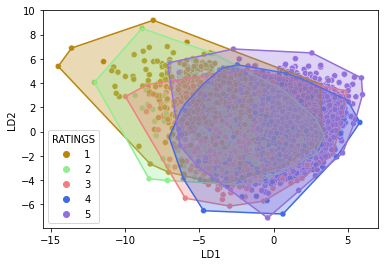

In [24]:
ax = sns.scatterplot(data=visualizedf, x="LD1", y="LD2", hue="RATINGS", palette=palette)
label1 = visualizedf.loc[visualizedf.RATINGS == 1, :]
encircle(label1.LD1,
         label1.LD2,
         ec="pink",
         fc=palette[1],
         alpha=0.3)
encircle(label1.LD1,
         label1.LD2,
         ec=palette[1],
         fc="none",
         linewidth=1.5)

label2 = visualizedf.loc[visualizedf.RATINGS == 2, :]
encircle(label2.LD1,
         label2.LD2,
         ec="pink",
         fc=palette[2],
         alpha=0.3)
encircle(label2.LD1,
         label2.LD2,
         ec=palette[2],
         fc="none",
         linewidth=1.5)

label3 = visualizedf.loc[visualizedf.RATINGS == 3, :]
encircle(label3.LD1,
         label3.LD2,
         ec="pink",
         fc=palette[3],
         alpha=0.3)
encircle(label3.LD1,
         label3.LD2,
         ec=palette[3],
         fc="none",
         linewidth=1.5)

label4 = visualizedf.loc[visualizedf.RATINGS == 4, :]
encircle(label4.LD1,
         label4.LD2,
         ec="pink",
         fc=palette[4],
         alpha=0.3)
encircle(label4.LD1,
         label4.LD2,
         ec=palette[4],
         fc="none",
         linewidth=1.5)

label5 = visualizedf.loc[visualizedf.RATINGS == 5, :]
encircle(label5.LD1,
         label5.LD2,
         ec="pink",
         fc=palette[5],
         alpha=0.3)
encircle(label5.LD1,
         label5.LD2,
         ec=palette[5],
         fc="none",
         linewidth=1.5)

# ax.set_title('Scatterplot of LDA1 and LDA2 - FastText', fontsize=15)
plt.savefig('PNG/lda_scatterplot.png', dpi=300)